#Author:<br>
#**Harshita Nauhwar**<br>
##[harshitanauhwar15@gmail.com](https://)

##**Problem Statement**
**The Challenge is to build a Deep learning model and code to count the number of Capuchinbird calls within a given clip.**


#**Import and Install Dependencies**

## 1.1 Install Dependencies

In [ ]:
!pip install tensorflow==2.8.1 tensorflow-gpu==2.8.1 tensorflow-io matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 98.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully unin

## 1.2 Load Dependencies

In [ ]:
!pip install tensorflow-io==0.23.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

# 2. Build Data Loading Function

## 2.1 Define Paths to Files

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
base_path = "/content/drive/MyDrive/birdcall"
CAPUCHIN_FILE = os.path.join(base_path, 'Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
NOT_CAPUCHIN_FILE = os.path.join(base_path,'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')

Mounted at /content/drive


In [ ]:
CAPUCHIN_FILE

'/content/drive/MyDrive/birdcall/Parsed_Capuchinbird_Clips/XC3776-3.wav'

## 2.2 Build Dataloading Function

In [ ]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav  #16 Hz & single channel

In [ ]:
file_contents = tf.io.read_file(CAPUCHIN_FILE)
file_contents

<tf.Tensor: shape=(), dtype=string, numpy=b'RIFF\xbc\t\x04\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00data\x98\t\x04\x00\xc5\xf1(\xfb\x7f\x07F\x13|\x1c\xa3$\x07.R8\x03A\xbaF\xb6J\xb4NQR\x92S\x95Q\xa1M/I\xb3CJ;\x88/\xa2"X\x17\x12\x0e\xce\x04\xdd\xf9\x07\xeei\xe3\xc3\xda\xa5\xd2\xae\xc9\xc4\xc0P\xbaB\xb7\xb5\xb5-\xb3\xaa\xaf\xad\xad\x00\xafd\xb22\xb5\xeb\xb6\xf5\xb9m\xc0\x1e\xc9\xc6\xd0-\xd6\xba\xdbO\xe4[\xefG\xf9\xd2\xff\xc3\x04\x87\x0b\xec\x14m\x1e\xc6%\xc4+\xb22\xa3:\xd7@\x17C\x86B8BoC[D\xc5B\xda>\x9e:\x117\xeb2`,_#\x93\x19\x82\x10X\x08M\x00\xb2\xf7j\xee\t\xe5\xc1\xdc\xbc\xd6\xf3\xd2\xeb\xcfV\xcc\x1c\xc9\xc5\xc8b\xcc\x95\xd1\xe6\xd4\xe4\xd5\xda\xd7\xb2\xdd\x13\xe6\xf3\xec\xc8\xf0\x99\xf4\x00\xfc@\x06\xed\x0eX\x13\x94\x154\x19:\x1e!!\xcb\x1fj\x1cu\x1a\xdd\x19A\x17\xd6\x100\t\t\x04f\x01\xd3\xfd_\xf7\x84\xf0\xf7\xec\xb5\xec\x16\xec\xc1\xe8\xd8\xe4.\xe4V\xe72\xeb<\xed\xad\xeeb\xf2\xc1\xf8E\xff\x00\x04\x04\x08t\r!\x14\x83\x19\xfe\x1b\xd6\x1cJ\x1e\x

In [ ]:
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

In [ ]:
wav

<tf.Tensor: shape=(132300, 1), dtype=float32, numpy=
array([[-0.11117554],
       [-0.0378418 ],
       [ 0.05856323],
       ...,
       [-0.01077271],
       [-0.03436279],
       [-0.04879761]], dtype=float32)>

In [ ]:
#checking the frequency of the wave
sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=44100>

In [ ]:
wav = tf.squeeze(wav, axis=-1)
sample_rate = tf.cast(sample_rate, dtype=tf.int64)

In [ ]:
#converting the audio clip from 44100hz to 16000hz
wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)

## 2.3 Plot Wave

In [ ]:
# Loading wave files using the function above
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

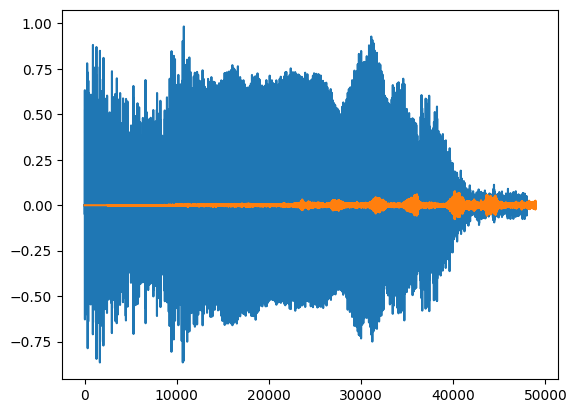

In [ ]:
plt.plot(wave)    #blue
plt.plot(nwave)   #orange
plt.show()

# 3. Create Tensorflow Dataset

## 3.1 Define Paths to Positive and Negative Data

In [ ]:
POS = os.path.join(base_path, 'Parsed_Capuchinbird_Clips')
NEG = os.path.join(base_path, 'Parsed_Not_Capuchinbird_Clips')

## 3.2 Create Tensorflow Datasets

In [ ]:
# to load files into a Dataset format
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

## 3.3 Add labels and Combine Positive and Negative Samples

In [ ]:
# return number of files for positive and negative samples respectively
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [ ]:
positives.as_numpy_iterator().next()

(b'/content/drive/MyDrive/birdcall/Parsed_Capuchinbird_Clips/XC46077-1.wav',
 1.0)

# 4. Determine Average Length of a Capuchin Call

## 4.1 Calculate Wave Cycle Length

In [ ]:
lengths = []
for file in os.listdir(os.path.join(base_path, 'Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join(base_path, 'Parsed_Capuchinbird_Clips', file))
    lengths.append(len(tensor_wave))

In [ ]:
lengths

[56000,
 48000,
 64000,
 64000,
 56000,
 64000,
 64000,
 48000,
 56000,
 56000,
 56000,
 56000,
 56000,
 32000,
 64000,
 64000,
 48000,
 48000,
 56000,
 64000,
 56000,
 56000,
 40000,
 64000,
 64000,
 56000,
 64000,
 40000,
 56000,
 64000,
 48000,
 64000,
 48000,
 56000,
 56000,
 56000,
 64000,
 48000,
 56000,
 64000,
 48000,
 40000,
 40000,
 48000,
 48000,
 56000,
 56000,
 56000,
 72000,
 56000,
 64000,
 56000,
 40000,
 64000,
 56000,
 48000,
 40000,
 48000,
 48000,
 48000,
 48000,
 48000,
 56000,
 40000,
 40000,
 64000,
 48000,
 48000,
 56000,
 40000,
 48000,
 56000,
 56000,
 64000,
 56000,
 64000,
 64000,
 48000,
 56000,
 64000,
 48000,
 48000,
 48000,
 64000,
 56000,
 56000,
 64000,
 48000,
 64000,
 64000,
 56000,
 56000,
 48000,
 48000,
 56000,
 48000,
 40000,
 40000,
 56000,
 64000,
 64000,
 48000,
 56000,
 56000,
 56000,
 56000,
 56000,
 64000,
 56000,
 56000,
 64000,
 56000,
 48000,
 48000,
 56000,
 56000,
 48000,
 56000,
 48000,
 64000,
 64000,
 40000,
 48000,
 64000,
 56000,


## 4.2 Calculate Mean, Min and Max

In [ ]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54159>

In [ ]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [ ]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

# 5. Build Preprocessing Function to Convert to Spectrogram

## 5.1 Build Preprocessing Function

In [ ]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

## 5.2 Test Out the Function and Viz the Spectrogram

### Positives

In [ ]:
filepath, label = positives.shuffle(buffer_size=1000).as_numpy_iterator().next()

In [ ]:
spectrogram, label = preprocess(filepath, label)

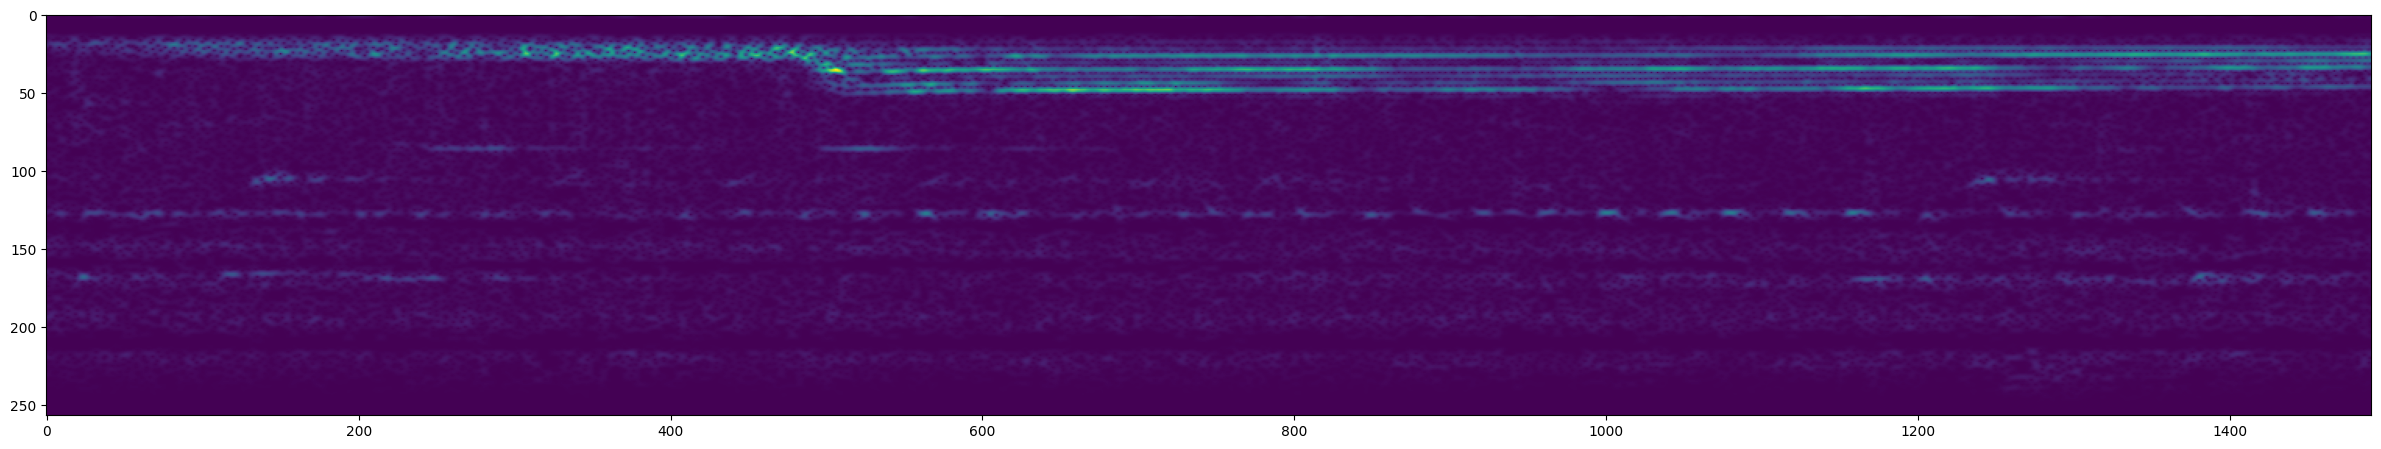

In [ ]:
# visualizing a capuchin bird call
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

### Negatives

In [ ]:
filepath, label = negatives.shuffle(buffer_size=1000).as_numpy_iterator().next()

In [ ]:
spectrogram, label = preprocess(filepath, label)

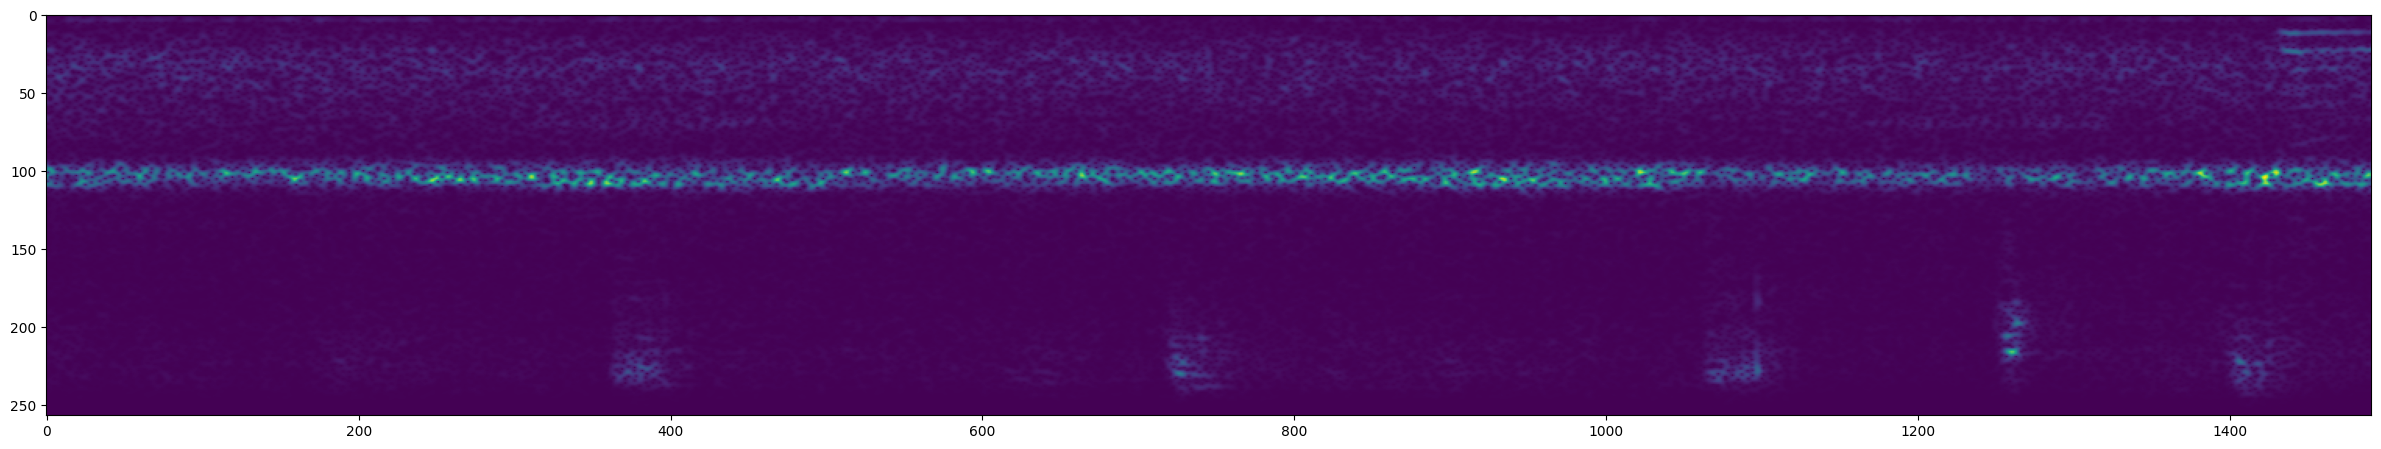

In [ ]:
# visualizing non capuchin bird call
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# 6. Create Training and Testing Partitions

## 6.1 Create a Tensorflow Data Pipeline

Prepocessing, caching and mixing up the data samples to avoid over-fitting
Then training on 16 sets at a time

In [ ]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

## 6.2 Split into Training and Testing Partitions

In [ ]:
train = data.take(36)
test = data.skip(36).take(15)

## 6.3 Test One Batch

In [ ]:
samples, labels = train.as_numpy_iterator().next()

In [ ]:
samples.shape
# 16 different examples of the spectogram with the shape of 1491/257/1

(16, 1491, 257, 1)

# 7. Build Deep Learning Model

## 7.1 Load Tensorflow Dependencies

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

## 7.2 Build Sequential Model, Compile and View Summary

In [ ]:
model = Sequential()

#adding convolutional layer, 16 different kernels of shape 3/2
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1491, 257,1))) # relu- rectified linear unit
model.add(Conv2D(16, (3,3), activation='relu'))

#flattening from 3d to single dimension
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision()]) #using adam optimizer

## 7.3 Fit Model, View Loss and KPI Plots


Training Progress:
------------------------------------
Epoch 1/10


2021-10-02 08:30:49.300887: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


7/7 [==============================] - 1s 26ms/step - loss: 0.7714 - accuracy: 0.7315 - val_loss: 0.6208 - val_accuracy: 0.8519
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 0.5176 - accuracy: 0.8241 - val_loss: 0.4969 - val_accuracy: 0.8519
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 0.4196 - accuracy: 0.8333 - val_loss: 0.4353 - val_accuracy: 0.8519
Epoch 4/10
7/7 [==============================] - 0s 4ms/step - loss: 0.3740 - accuracy: 0.8426 - val_loss: 0.3933 - val_accuracy: 0.8519
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 0.3282 - accuracy: 0.8519 - val_loss: 0.3599 - val_accuracy: 0.8519
Epoch 6/10
7/7 [==============================] - 0s 4ms/step - loss: 0.3056 - accuracy: 0.8611 - val_loss: 0.3313 - val_accuracy: 0.8519
Epoch 7/10
7/7 [==============================] - 0s 5ms/step - loss: 0.2763 - accuracy: 0.8519 - val_loss: 0.3112 - val_accuracy: 0.8519
Epoch 8/10
7/7 [============================

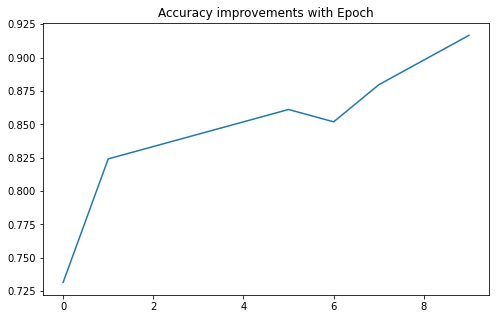


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 16ms/step - loss: 0.2216 - accuracy: 0.9333


[0.22156038880348206, 0.9333333373069763]

In [ ]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

# 8. Make a Prediction on a Single Clip

## 8.1 Get One Batch and Make a Prediction

In [ ]:
X_test, y_test = test.as_numpy_iterator().next()

In [ ]:
yhat = model.predict(X_test)

## 8.2 Convert Logits to Classes

In [ ]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

In [ ]:
# predicting what is capuchin and what is not
yhat

[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0]


# 9. Build Forest Parsing Functions

## 9.1 Load up MP3s

In [ ]:
# for forest recordings
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
mp3 = os.path.join(base_path, 'Forest Recordings', 'recording_00.mp3')

In [ ]:
wav = load_mp3_16k_mono(mp3)

In [ ]:
# slicing into same size audio for multiple predictions
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [ ]:
len(audio_slices)

60

In [ ]:
samples, index = audio_slices.as_numpy_iterator().next()

## 9.2 Build Function to Convert Clips into Windowed Spectrograms

In [ ]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

## 9.3 Convert Longer Clips and Make Predictions

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=16000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [ ]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

## 9.4 Group Consecutive Detections

In [ ]:
from itertools import groupby

In [ ]:
yhat = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat).numpy()

In [ ]:
calls

4

# 10. Make Predictions

## 10.1 Loop over all recordings and make predictions

In [ ]:
results = {}
for file in os.listdir(os.path.join(base_path, 'Forest Recordings')):
    FILEPATH = os.path.join(base_path,'Forest Recordings', file)

    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)

    yhat = model.predict(audio_slices)

    results[file] = yhat

In [ ]:
results

## 10.2 Convert Predictions into Classes

In [ ]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

## 10.3 Group Consecutive Detections

In [ ]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

# 11. Export Results

In [ ]:
import csv

In [ ]:
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])